# Exploratory Data Analysis (EDA) Датасет по выбросам CO2 и климатическим показателям
Введение
**Цель анализа:** Исследование структуры, целостности и качества датасета, содержащего данные о выбросах CO2 и других климатических показателях по странам и годам.
**Задачи:**
1. Оценка структуры данных
2. Анализ целостности и полноты данных
3. Выявление выбросов и аномалий
4. Формирование выводов о пригодности данных для дальнейшего анализа

# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True) 

# Загрузка данных в DataFrame

In [31]:
df = pd.read_csv("data.csv") #Загрузка данных и просмотр первых 5 строк
df.head(5)

,Description,Name,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Country,Afghanistan,1850,AFG,3752993.0,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.436,0.629,NaN,NaN
1,Country,Afghanistan,1851,AFG,3767956.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.156,0.0,0.0,0.0,0.0,7.500,0.633,NaN,NaN
2,Country,Afghanistan,1852,AFG,3783940.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.560,0.637,NaN,NaN
3,Country,Afghanistan,1853,AFG,3800954.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.620,0.641,NaN,NaN
4,Country,Afghanistan,1854,AFG,3818038.0,NaN,0.0,0.0,NaN,NaN,...,NaN,0.155,0.0,0.0,0.0,0.0,7.678,0.644,NaN,NaN


# Изучение типов и формы данных

In [32]:
df.dtypes # Изучение типов данных по колонкам

Description                                   object
Name                                          object
year                                           int64
iso_code                                      object
population                                   float64
gdp                                          float64
cement_co2                                   float64
cement_co2_per_capita                        float64
co2                                          float64
co2_growth_abs                               float64
co2_growth_prct                              float64
co2_including_luc                            float64
co2_including_luc_growth_abs                 float64
co2_including_luc_growth_prct                float64
co2_including_luc_per_capita                 float64
co2_including_luc_per_gdp                    float64
co2_including_luc_per_unit_energy            float64
co2_per_capita                               float64
co2_per_gdp                                  f

In [33]:
df.shape # Общее представление о форме и данных

(43746, 80)

Данные представлены в виде таблицы на 43746 строк и 80 столбцов. Большая часть данных - количественные, нецелочисленные данные. 

# Выявление повторяющихся строк

In [64]:
duplicate_rows_df = df[df.duplicated()] # Анализ дупликатов значений
print("Количество повторяющихся строк: ", duplicate_rows_df.shape)

Количество повторяющихся строк:  (0, 80)


# Поиск пустых значений

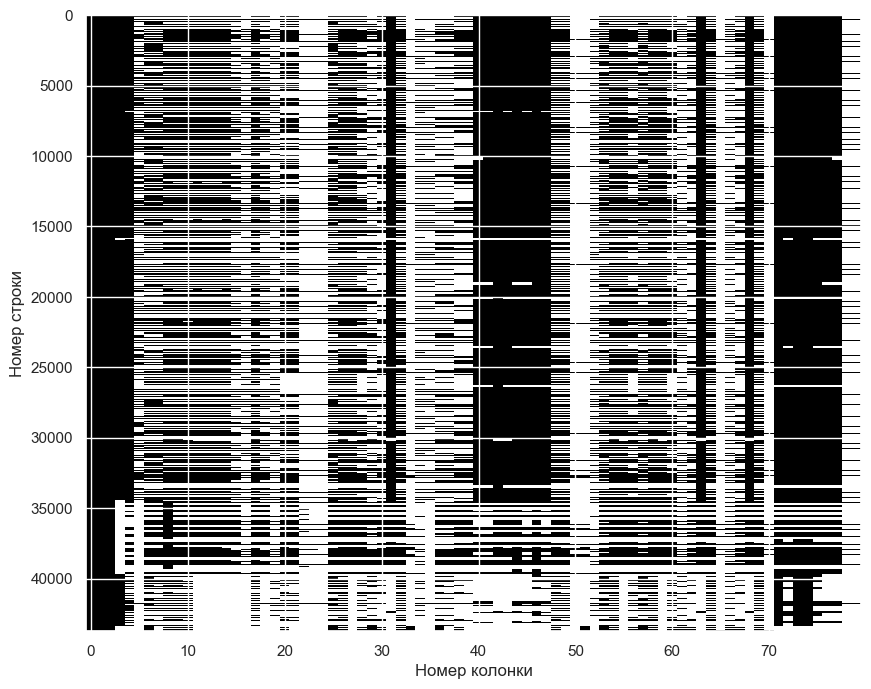

In [62]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Номер колонки")
plt.ylabel("Номер строки");

Исходя из рисунка видно, что данные имеют большое количество пропусков, это может быть связано с отсутствием наблюдений в конце 19 века и начале 20ого.

In [ ]:
Количество и процент нулей по колонкам

In [60]:
pd.set_option('display.max_rows', None)
nulls = df.isnull().sum().to_frame('Количество_нулей')
nulls['Процент_нулей'] = (nulls['Количество_нулей'] / len(df)) * 100
print(nulls)

                                           Количество_нулей  Процент_нулей
Description                                               0       0.000000
Name                                                      0       0.000000
year                                                      0       0.000000
iso_code                                               5825      13.315503
population                                             5781      13.214923
gdp                                                   28757      65.736296
cement_co2                                            20134      46.024779
cement_co2_per_capita                                 21031      48.075253
co2                                                   16687      38.145202
co2_growth_abs                                        18759      42.881635
co2_growth_prct                                       19078      43.610844
co2_including_luc                                     20161      46.086499
co2_including_luc_growth_

consumption_co2                      88.876697
consumption_co2_per_capita           89.708773
consumption_co2_per_gdp              89.841357
cumulative_other_co2                 93.366251
other_co2_per_capita                 94.367485
other_industry_co2                   93.366251
share_global_cumulative_other_co2    95.181274
share_global_other_co2               95.181274
trade_co2                            89.633338
trade_co2_share                      89.633338
dtype: float64


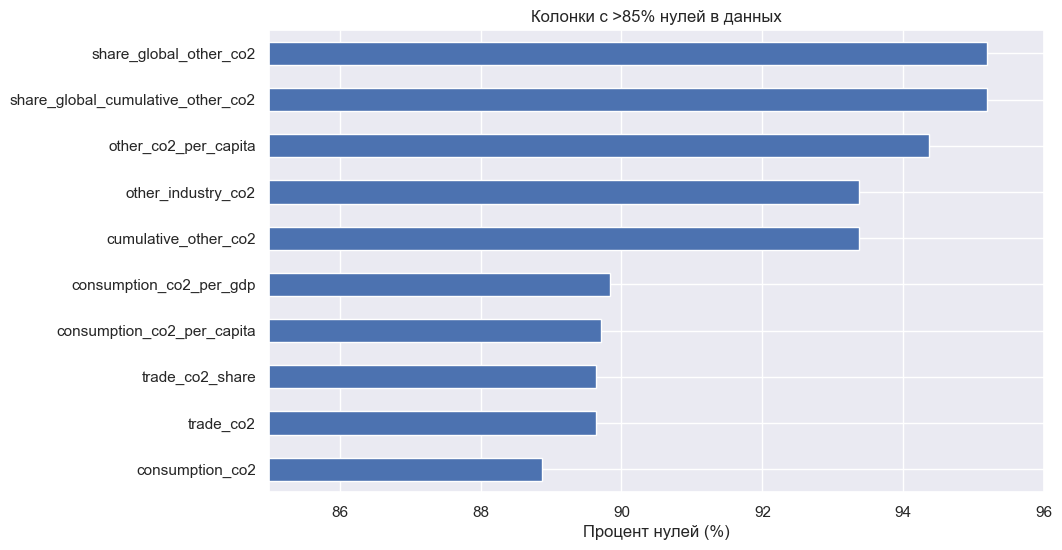

In [61]:
null_percent = df.isnull().mean() * 100  

cols_with_many_nulls = null_percent[null_percent > 85] # Данные содержат очень много нулей, поэтому процент нулей не соответствует заданию
print(cols_with_many_nulls)

cols_with_many_nulls.sort_values().plot(kind='barh', figsize=(10,6))

plt.xlabel("Процент нулей (%)")
plt.title("Колонки с >85% нулей в данных")
plt.xlim(85, 96)
plt.show()

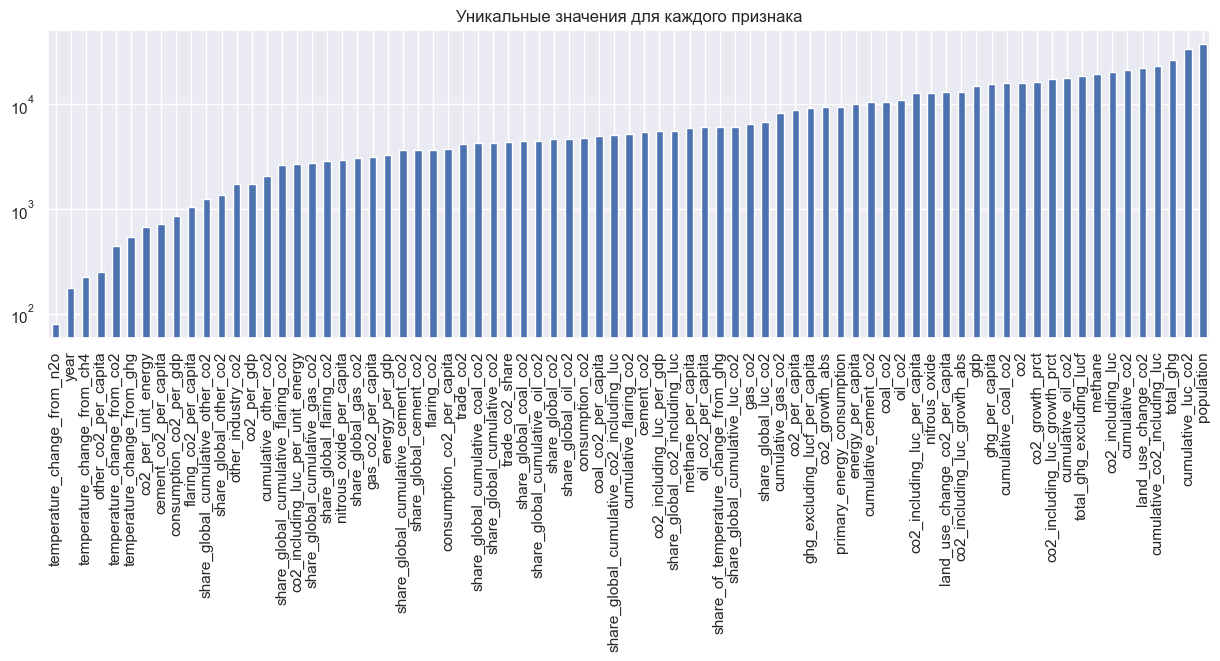

In [42]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Уникальные значения для каждого признака");

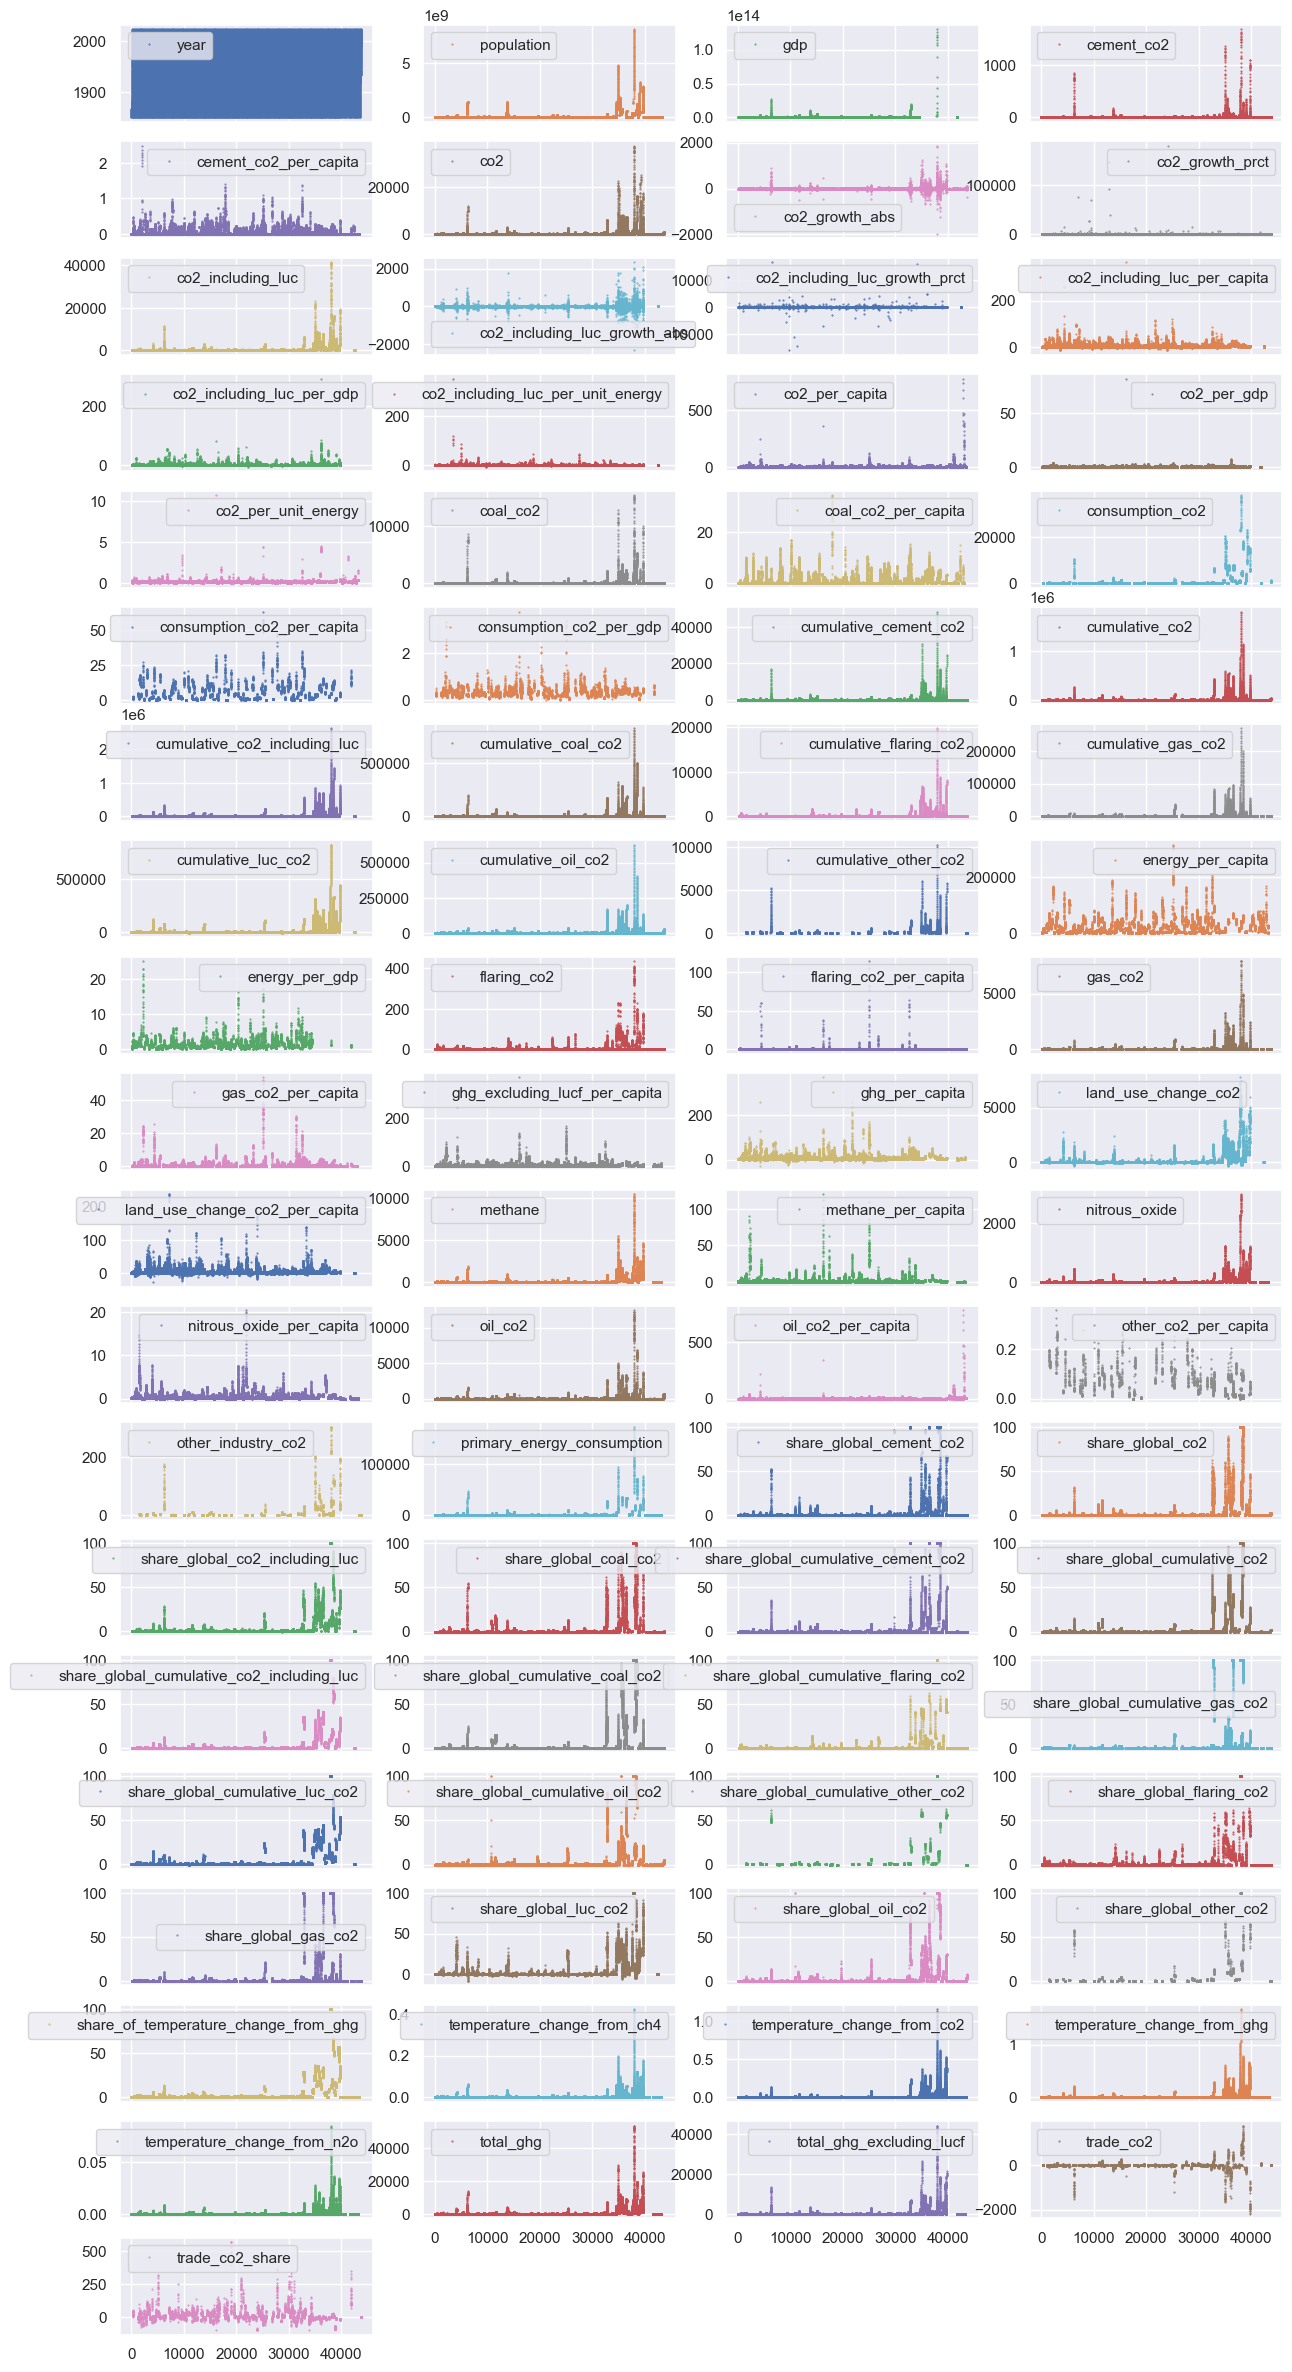

In [43]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 30), markersize=1);

Каждая точка на этом рисунке представляет собой строку из набора данных, а каждый подграфик — отдельный признак. По оси Y отложено значение признака, а по оси X — индекс выборки

In [48]:
print("\n=== ВРЕМЕННОЙ ПЕРИОД ДАННЫХ ===")
if 'year' in df.columns:
    print(f"Период данных: {df['year'].min()} - {df['year'].max()} годы")
    print(f"Количество уникальных лет: {df['year'].nunique()}")


=== ВРЕМЕННОЙ ПЕРИОД ДАННЫХ ===
Период данных: 1850 - 2023 годы
Количество уникальных лет: 174


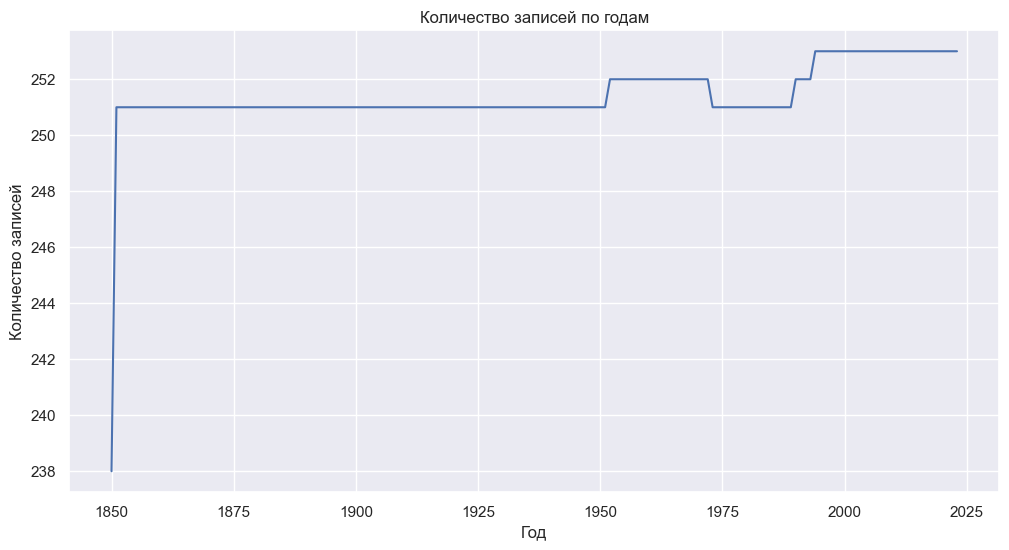

In [50]:
yearly_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line')
plt.title('Количество записей по годам')
plt.xlabel('Год')
plt.ylabel('Количество записей')
plt.grid(True)
plt.show()

Исходя из анализа нулей и распределения данных по годам, видно, что количество нулей во многих колонках распределено прериодически. В целом можно сказать, что по многим признакам не хватает данных.

# Анализ выбросов

In [55]:
key_metrics = [
    'population', 'gdp', 'co2', 'co2_per_capita', 
    'methane', 'nitrous_oxide', 'primary_energy_consumption'
] # Определили ключевые метрики исходя их полноты данных

In [ ]:
existing_metrics = [col for col in key_metrics if col in df.columns]

In [67]:
print("\n=== АНАЛИЗ ВЫБРОСОВ ПО МЕТОДУ IQR ===")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound

outliers_summary = []
for col in existing_metrics:
    if col in df.columns:
        clean_data = df[col].dropna()
        if len(clean_data) > 0:
            n_outliers, lower, upper = detect_outliers_iqr(clean_data)
            outlier_percentage = (n_outliers / len(clean_data)) * 100
            outliers_summary.append({
                'Метрика': col,
                'Выбросы': n_outliers,
                'Процент выбросов': f"{outlier_percentage:.2f}%",
                'Нижняя граница': f"{lower:.2f}",
                'Верхняя граница': f"{upper:.2f}"
            })

outliers_df = pd.DataFrame(outliers_summary)
display(outliers_df)


=== АНАЛИЗ ВЫБРОСОВ ПО МЕТОДУ IQR ===


,Метрика,Выбросы,Процент выбросов,Нижняя граница,Верхняя граница
0,population,5895,15.53%,-13675139.00,23678501.00
1,gdp,2144,14.30%,-167454302720.00,300306181632.00
2,co2,4959,18.33%,-88.81,149.32
3,co2_per_capita,1860,7.48%,-6.32,11.09
4,methane,6282,16.79%,-29.09,49.73
5,nitrous_oxide,6020,15.73%,-7.47,12.64
6,primary_energy_consumption,1563,15.40%,-683.83,1159.94


Присутствуют значительные выбросы в ключевых метриках (CO2, население, ВВП и др.). Выбросы могут быть объяснены реальными различиями между странами

# Анализ категориальных данных

In [65]:
print("\n=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ ===")

if 'Name' in df.columns:
    country_counts = df['Name'].value_counts()
    print(f"Количество уникальных стран: {len(country_counts)}")
    print(f"Страны с наибольшим количеством записей:")
    display(country_counts.head(10))
    
    # Проверка на аномальные названия (очень короткие/длинные)
    country_name_lengths = df['Name'].str.len()
    unusual_names = df[country_name_lengths < 3]['Name'].unique()
    if len(unusual_names) > 0:
        print(f"\nПодозрительно короткие названия: {unusual_names}")


=== АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ ===
Количество уникальных стран: 253
Страны с наибольшим количеством записей:


Name
Afghanistan              174
Myanmar                  174
Sao Tome and Principe    174
Saudi Arabia             174
Senegal                  174
Serbia                   174
Seychelles               174
Sierra Leone             174
Singapore                174
Slovakia                 174
Name: count, dtype: int64

In [66]:
desc_counts = df["Description"].value_counts().reset_index()
desc_counts.columns = ["Description", "Row_Count"]
desc_counts["Percent"] = (desc_counts["Row_Count"] / len(df)) * 100
print(desc_counts) 

            Description  Row_Count    Percent
0               Country      34451  78.752343
1     Special_Territory       3643   8.327619
2                Region       3530   8.069309
3        Economic_Group       1740   3.977507
4  International_Sector        382   0.873223


Категориальные данные не имеют ошибок и четко структурированы. Страны представлены категориями, среди которых наиболее популярная - "Country", а наименнее популярная - "International_Sector"

# Заключение 
""Стуктура данных""
**Объем данных:** Датсет содержит 72,680 записей и 69 признаков - достаточно большой объем для анализа.
**Типы данных:** Преобладают числовые данные (float64 - 64 колонки), что соответствует тематике датасета (метрики и показатели).
**Структура:** Данные организованы в табличном формате с четкой структурой "страна-год".
**Категориальные переменные:** Всего 3 категориальные колонки, что логично для данного типа данных.
""Целостность и полнота""
**Пропуски данных:** Высокий уровень пропусков (49.55%) - серьезная проблема датасета
**Распределение пропусков:** Пропуски сконцентрированы в специфичных метриках (температурные изменения, торговые выбросы)
**Ключевые показатели:** Базовые метрики (CO2, население) имеют меньше пропусков
**Дубликаты:** Отсутствуют полные дубликаты, что свидетельствует о хорошем качестве первичной обработки
**Временное покрытие:** Данные охватывают длительный исторический период с (1850г-2023г)
**Качественные данные:** Категориальные переменные не содержат явных аномалий
""Анализ выбросов""
**Выбросы:** Присутствуют значительные выбросы в ключевых метриках (CO2, население, ВВП)
**Природа выбросов:** Выбросы могут быть объяснены реальными различиями между странами